# Autocorrelation analysis on pulses

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import dedisperse_dynspec as dd
import copy
from stickel import Stickel

DM = 275
approx_lag_peaks = {}

In [3]:
def autocorrelate(lightcurve):
    ffted = np.fft.rfft(lightcurve)
    fft_autocorred = ffted * np.conjugate(ffted)
    autocorred = np.fft.irfft(fft_autocorred, n=lightcurve.shape[0])
    return autocorred[:len(ffted)]

In [4]:
def plot_autocorrelate(autocorred, dt):
    lags = np.arange(len(autocorred))*dt
    plt.plot(lags[1:], autocorred[1:])
    plt.xlabel("Lag (s)")
    plt.ylabel("Correlation coefficient (a.u.)")

## 1340639536

#### Make the dynamic spectrum and lightcurve

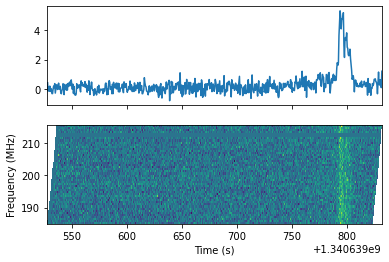

In [5]:
obs = 1340639536
yaml_file = f"{obs}.yaml"
with open(yaml_file, 'r') as yaml:
    params = dd.parse_yaml(yaml)
    dynspec = dd.Dynspec(**params)

dynspec.set_freq_ref('high')
dynspec.add_dm_padding(DM, fill_value=0.0)

dynspec.dedisperse(DM)
dynspec.fscrunch()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec.plot_lightcurve(axs[0])
dynspec.plot(axs[1])

#### Truncate lightcurve to get rid of lightcurve that is noise dominated

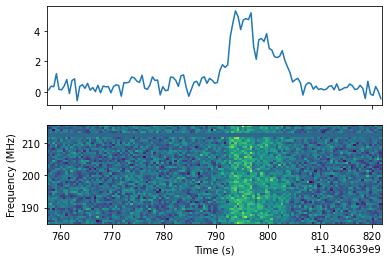

In [6]:
dynspec_pruned = copy.deepcopy(dynspec)
dynspec_pruned.prune_time(230, before=True, after=False)
dynspec_pruned.prune_time(10, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned.plot(axs[1])
dynspec_pruned.plot_lightcurve(axs[0])

#### Autocorrelate the lightcurve

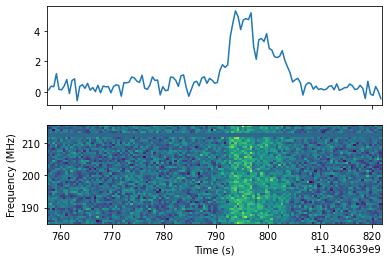

In [7]:
fig

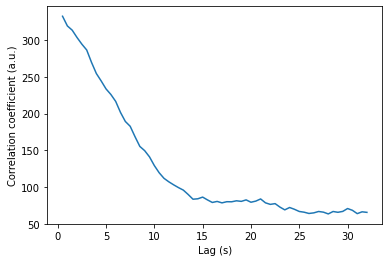

In [8]:
autocorred = autocorrelate(dynspec_pruned.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned.dt)

Slight hump at ~20 s, but nothing here worth chasing up -- onto the next one!

## 1340641016

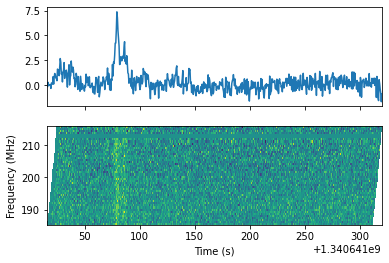

In [9]:
obs = 1340641016
yaml_file = f"{obs}.yaml"
with open(yaml_file, 'r') as yaml:
    params = dd.parse_yaml(yaml)
    dynspec = dd.Dynspec(**params)

dynspec.set_freq_ref('low')
dynspec.add_dm_padding(DM, fill_value=0.0)

dynspec.dedisperse(DM)
dynspec.fscrunch()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec.plot_lightcurve(axs[0])
dynspec.plot(axs[1])

#### Truncate lightcurve to get rid of lightcurve that is noise dominated

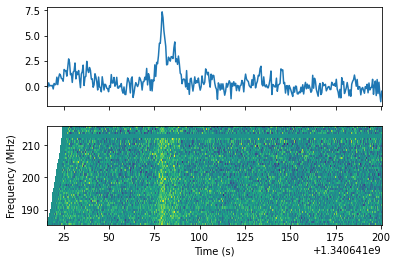

In [10]:
dynspec_pruned = copy.deepcopy(dynspec)
#dynspec_pruned.prune_time(230, before=True, after=False)
dynspec_pruned.prune_time(120, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned.plot(axs[1])
dynspec_pruned.plot_lightcurve(axs[0])

#### Autocorrelate the lightcurve

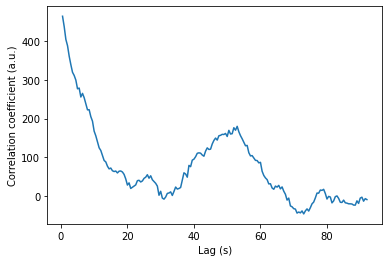

In [11]:
autocorred = autocorrelate(dynspec_pruned.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned.dt)

Clear peak around ~52 s, which corresponds to the separation between the left-most component and the main, brightest component.

In [12]:
approx_lag_peaks[obs] = [26, 52]

## 1341844600

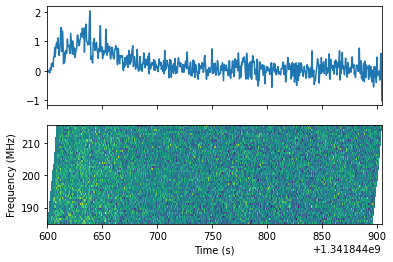

In [13]:
obs = 1341844600
yaml_file = f"{obs}.yaml"
with open(yaml_file, 'r') as yaml:
    params = dd.parse_yaml(yaml)
    dynspec = dd.Dynspec(**params)

dynspec.set_freq_ref('low')
dynspec.add_dm_padding(DM, fill_value=0.0)

dynspec.dedisperse(DM)
dynspec.fscrunch()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec.plot_lightcurve(axs[0])
dynspec.plot(axs[1])

#### Truncate lightcurve to get rid of lightcurve that is noise dominated

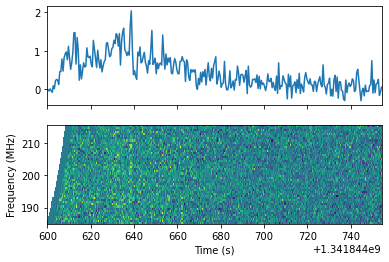

In [14]:
dynspec_pruned = copy.deepcopy(dynspec)
#dynspec_pruned.prune_time(230, before=True, after=False)
dynspec_pruned.prune_time(150, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned.plot(axs[1])
dynspec_pruned.plot_lightcurve(axs[0])

#### Autocorrelate the lightcurve

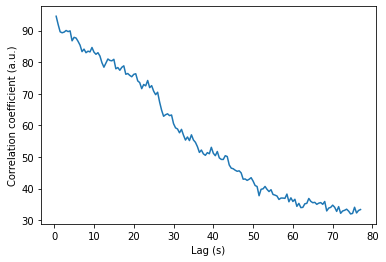

In [15]:
autocorred = autocorrelate(dynspec_pruned.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned.dt)

Nothing worth following up.

## 1341845784

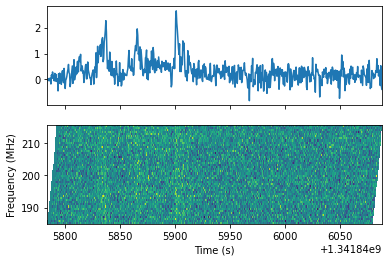

In [16]:
obs = 1341845784
yaml_file = f"{obs}.yaml"
with open(yaml_file, 'r') as yaml:
    params = dd.parse_yaml(yaml)
    dynspec = dd.Dynspec(**params)

dynspec.set_freq_ref('low')
dynspec.add_dm_padding(DM, fill_value=0.0)

dynspec.dedisperse(DM)
dynspec.fscrunch()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec.plot_lightcurve(axs[0])
dynspec.plot(axs[1])

#### Truncate lightcurve to get rid of lightcurve that is noise dominated

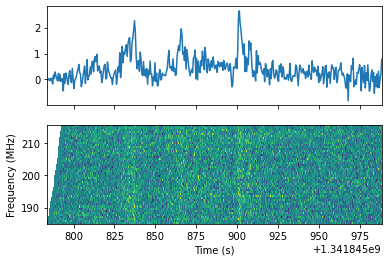

In [17]:
dynspec_pruned = copy.deepcopy(dynspec)
#dynspec_pruned.prune_time(230, before=True, after=False)
dynspec_pruned.prune_time(100, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned.plot(axs[1])
dynspec_pruned.plot_lightcurve(axs[0])

#### Autocorrelate the lightcurve

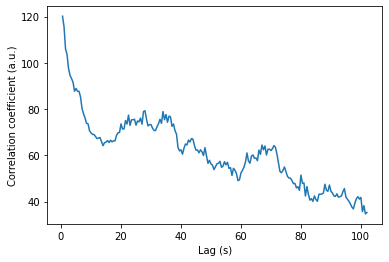

In [18]:
autocorred = autocorrelate(dynspec_pruned.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned.dt)

The complexity of the second peak (in the lag range 20 to 40s) it possibly connected to the visibly different spacing between the three main components of this pulse (i.e. the time between the first and second components is smaller than between the second and third.) Neverthless, the average spacing is still roughly 25s.

In [19]:
approx_lag_peaks[obs] = [26]

## 1341930288

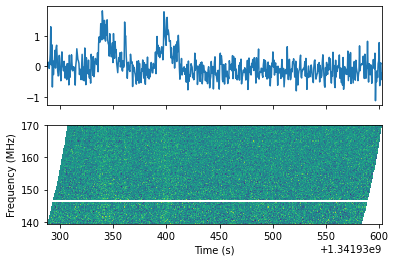

In [20]:
obs = 1341930288
yaml_file = f"{obs}.yaml"
with open(yaml_file, 'r') as yaml:
    params = dd.parse_yaml(yaml)
    dynspec = dd.Dynspec(**params)

dynspec.set_freq_ref('low')
dynspec.add_dm_padding(DM, fill_value=0.0)

dynspec.dedisperse(DM)
dynspec.fscrunch()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec.plot_lightcurve(axs[0])
dynspec.plot(axs[1])

#### Truncate lightcurve to get rid of lightcurve that is noise dominated

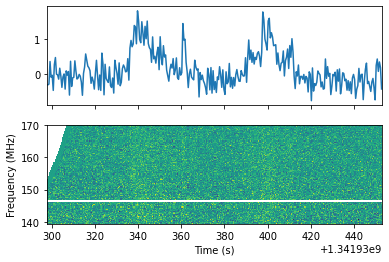

In [21]:
dynspec_pruned = copy.deepcopy(dynspec)
dynspec_pruned.prune_time(10, before=True, after=False)
dynspec_pruned.prune_time(150, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned.plot(axs[1])
dynspec_pruned.plot_lightcurve(axs[0])

#### Autocorrelate the lightcurve

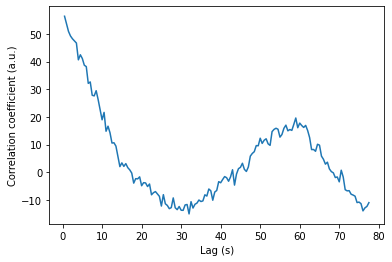

In [22]:
autocorred = autocorrelate(dynspec_pruned.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned.dt)

This seems like quite different behaviour from anything we've seen so far. The separation between the two components appears to correspond to the lag peak around 58s.

In [23]:
approx_lag_peaks[obs] = [58]

## 1341931472

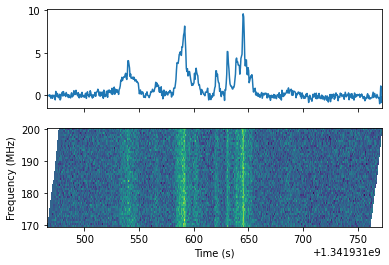

In [24]:
obs = 1341931472
yaml_file = f"{obs}.yaml"
with open(yaml_file, 'r') as yaml:
    params = dd.parse_yaml(yaml)
    dynspec = dd.Dynspec(**params)

dynspec.set_freq_ref('centre')
dynspec.add_dm_padding(DM, fill_value=0.0)

dynspec.dedisperse(DM)
dynspec.fscrunch()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec.plot_lightcurve(axs[0])
dynspec.plot(axs[1])

#### Truncate lightcurve to get rid of lightcurve that is noise dominated

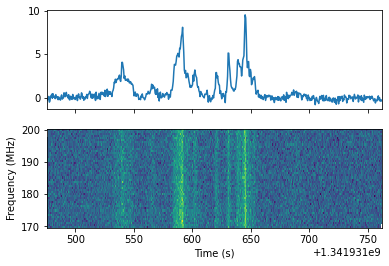

In [25]:
dynspec_pruned = copy.deepcopy(dynspec)
dynspec_pruned.prune_time(10, before=True, after=False)
dynspec_pruned.prune_time(10, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned.plot(axs[1])
dynspec_pruned.plot_lightcurve(axs[0])

#### Autocorrelate the lightcurve

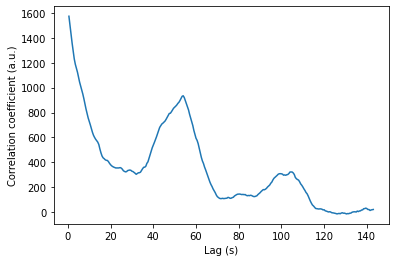

In [26]:
autocorred = autocorrelate(dynspec_pruned.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned.dt)

The now-familiar peak around ~55s is present. The second lag peak is the separation between the first and third main components. The obvious substructure in the time domain is completely obscured by the power at low lags. I wonder if it's possible to tease it out by more agressive pruning?

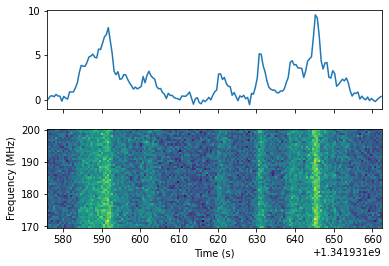

In [27]:
dynspec_pruned2 = copy.deepcopy(dynspec)
dynspec_pruned2.prune_time(110, before=True, after=False)
dynspec_pruned2.prune_time(110, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned2.plot(axs[1])
dynspec_pruned2.plot_lightcurve(axs[0])

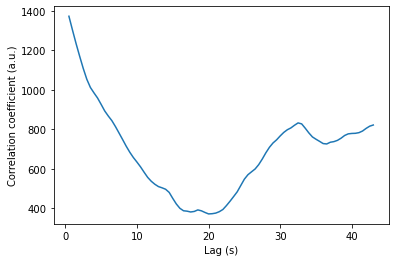

In [28]:
autocorred = autocorrelate(dynspec_pruned2.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned2.dt)

Nope, I guess not. But what does the FFT say?

(573, 0.5)

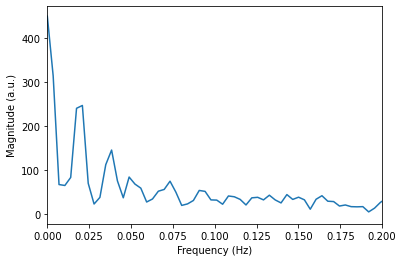

In [36]:
ffted = np.fft.rfft(dynspec_pruned.fscrunched)
freqs = np.fft.rfftfreq(dynspec_pruned.Nt, d=dynspec_pruned.dt)
plt.plot(freqs, np.abs(ffted))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (a.u.)")
plt.xlim([0.0, 0.2])

It's still impossible to pick out any feature that doesn't looks like a harmonic of the ~55s lag. Try smoothing, subtracting, and then FFTing the residuals:

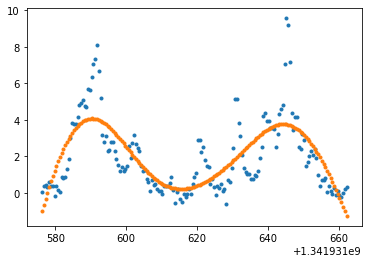

In [51]:
lightcurve_in_stickel_format = np.array([dynspec_pruned2.t, dynspec_pruned2.fscrunched]).T
s = Stickel(lightcurve_in_stickel_format)
s.smooth_y(1e-1) # <-- magic regression parameter. Sets smoothness of fit. Higher number = smoother
s.plot(smooth=True)

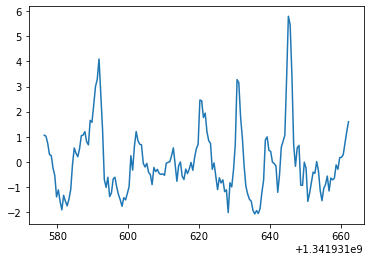

In [52]:
residuals = s.ydata - s.yhat
plt.plot(dynspec_pruned2.t, residuals)

Text(0.5, 1.0, 'Max period = 14.4 s')

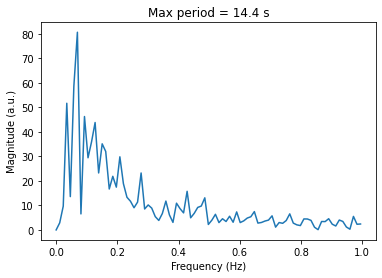

In [58]:
ffted = np.fft.rfft(residuals)
freqs = np.fft.rfftfreq(len(residuals), d=dynspec_pruned.dt)
plt.plot(freqs, np.abs(ffted))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (a.u.)")
period_max = 1/freqs[np.argmax(np.abs(ffted))]
plt.title(f"Max period = {period_max:.1f} s")

In [30]:
approx_lag_peaks[obs] = [55]

## 1341937984

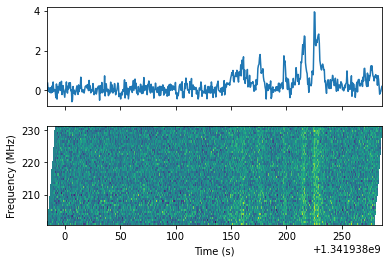

In [59]:
obs = 1341937984
yaml_file = f"{obs}.yaml"
with open(yaml_file, 'r') as yaml:
    params = dd.parse_yaml(yaml)
    dynspec = dd.Dynspec(**params)

dynspec.set_freq_ref('low')
dynspec.add_dm_padding(DM, fill_value=0.0)

dynspec.dedisperse(DM)
dynspec.fscrunch()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec.plot_lightcurve(axs[0])
dynspec.plot(axs[1])

#### Truncate lightcurve to get rid of lightcurve that is noise dominated

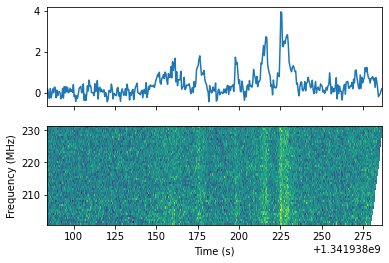

In [61]:
dynspec_pruned = copy.deepcopy(dynspec)
dynspec_pruned.prune_time(100, before=True, after=False)
#dynspec_pruned.prune_time(150, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned.plot(axs[1])
dynspec_pruned.plot_lightcurve(axs[0])

#### Autocorrelate the lightcurve

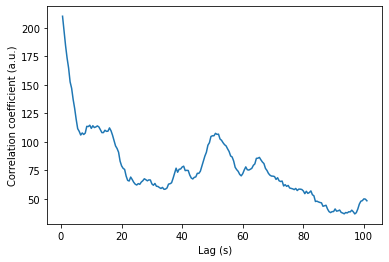

In [63]:
autocorred = autocorrelate(dynspec_pruned.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned.dt)

This seems like quite different behaviour from anything we've seen so far. The separation between the two components appears to correspond to the lag peak around 58s.

In [64]:
approx_lag_peaks[obs] = [52]